# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [41]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [42]:
# Your code here. 
df = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
df


,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

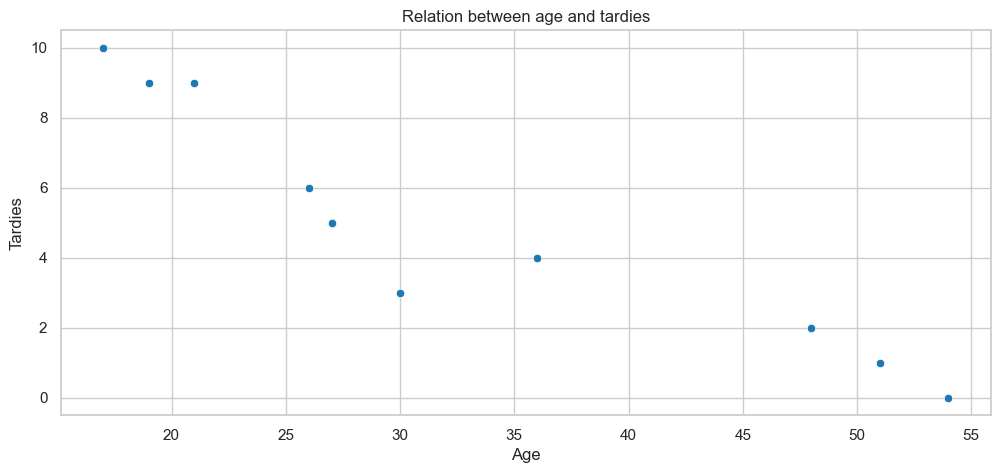

In [43]:
# Your code here
import matplotlib.pylab as plt
%matplotlib inline 
plt.rc('font', size=12)
plt.rc('figure', figsize=(12,5))

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

# Gráfico de dispersión
sns.scatterplot(data=df, x='Age', y='Tardies')
plt.title("Relation between age and tardies")
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

*your explanation here*

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [44]:
cov = df.cov().loc['Age', 'Tardies']
corr = df.corr().loc['Age', 'Tardies']

cov, corr

(np.float64(-45.56666666666666), np.float64(-0.9391626886887123))

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [45]:
# your explanation here
X = df[['Age']]      
y = df['Tardies']   

model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])

Intercept: 12.888803363135771
Slope: -0.2428207709159809


Plot your regression model on your scatter plot.

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


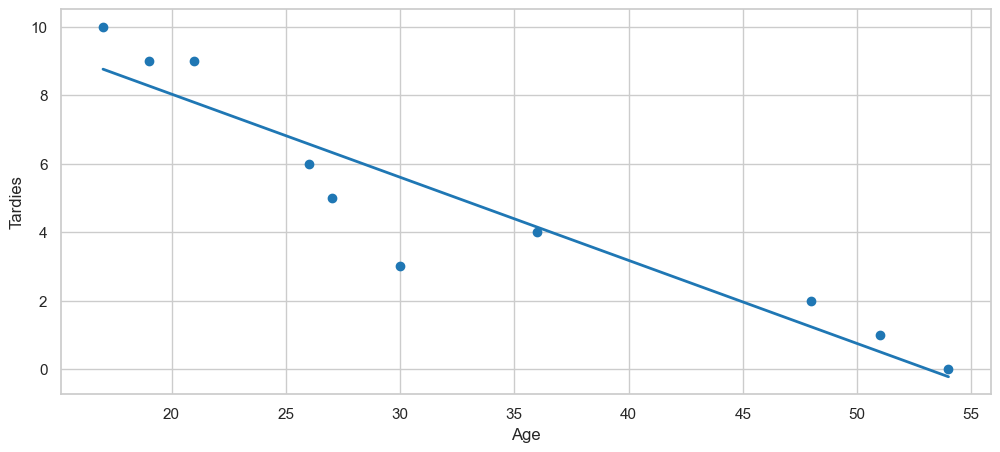

In [46]:
# Your code here.
plt.scatter(X, y)

# Crear valores para dibujar la línea de la regresión
x_range = np.linspace(df['Age'].min(), df['Age'].max(), 100).reshape(-1,1)
y_pred = model.predict(x_range)

# Graficar la línea del modelo
plt.plot(x_range, y_pred)

plt.xlabel('Age')
plt.ylabel('Tardies')
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

*your explanation here*

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [47]:
# Import any libraries you may need & the data
vehicles = pd.read_csv(r"/Users/helenagomez/Documents/ironHack/lab-regression-analysis-en/vehicles.csv")
vehicles.head()


,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [48]:
# Your code here
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     35952 non-null  object 
 1   Model                    35952 non-null  object 
 2   Year                     35952 non-null  int64  
 3   Engine Displacement      35952 non-null  float64
 4   Cylinders                35952 non-null  float64
 5   Transmission             35952 non-null  object 
 6   Drivetrain               35952 non-null  object 
 7   Vehicle Class            35952 non-null  object 
 8   Fuel Type                35952 non-null  object 
 9   Fuel Barrels/Year        35952 non-null  float64
 10  City MPG                 35952 non-null  int64  
 11  Highway MPG              35952 non-null  int64  
 12  Combined MPG             35952 non-null  int64  
 13  CO2 Emission Grams/Mile  35952 non-null  float64
 14  Fuel Cost/Year        

In [49]:
vehicles.describe()

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
count,35952.00000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000
mean,2000.71640,3.338493,5.765076,17.609056,17.646139,23.880646,19.929322,475.316339,1892.598465
std,10.08529,1.359395,1.755268,4.467283,4.769349,5.890876,5.112409,119.060773,506.958627
min,1984.00000,0.600000,2.000000,0.060000,6.000000,9.000000,7.000000,37.000000,600.000000
25%,1991.00000,2.200000,4.000000,14.699423,15.000000,20.000000,16.000000,395.000000,1500.000000
50%,2001.00000,3.000000,6.000000,17.347895,17.000000,24.000000,19.000000,467.736842,1850.000000
75%,2010.00000,4.300000,6.000000,20.600625,20.000000,27.000000,23.000000,555.437500,2200.000000
max,2017.00000,8.400000,16.000000,47.087143,58.000000,61.000000,56.000000,1269.571429,5800.000000


In [50]:
vehicles.isnull().sum()

Make                       0
Model                      0
Year                       0
Engine Displacement        0
Cylinders                  0
Transmission               0
Drivetrain                 0
Vehicle Class              0
Fuel Type                  0
Fuel Barrels/Year          0
City MPG                   0
Highway MPG                0
Combined MPG               0
CO2 Emission Grams/Mile    0
Fuel Cost/Year             0
dtype: int64

In [51]:
vehicles.duplicated().sum()   # cuántos duplicados



np.int64(0)

In [52]:

vehicles = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]

In [53]:
vehicles.dtypes

Year                         int64
Cylinders                  float64
Fuel Barrels/Year          float64
Combined MPG                 int64
Fuel Cost/Year               int64
CO2 Emission Grams/Mile    float64
dtype: object

In [54]:
correlations = vehicles.corr()
correlations['CO2 Emission Grams/Mile']

Year                      -0.222300
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
Combined MPG              -0.926229
Fuel Cost/Year             0.930865
CO2 Emission Grams/Mile    1.000000
Name: CO2 Emission Grams/Mile, dtype: float64

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [55]:
# regression multiple model 
from sklearn.linear_model import LinearRegression

X = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]

y = vehicles['CO2 Emission Grams/Mile']

model = LinearRegression()


model.fit(X, y)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 769.8882836465357
Coefficients: [-0.32061673  1.87879976 19.05292507 -3.04039938  0.03230948]


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [56]:
import statsmodels.api as sm
# Your code here.
X = sm.add_constant(X)

# Ajustamos el modelo
model_sm = sm.OLS(y, X).fit()

# Mostramos el resumen
print(model_sm.summary())

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Sat, 08 Nov 2025   Prob (F-statistic):               0.00
Time:                             22:50:43   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [57]:
# Your code here.
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array([1,3,4,6,8,9,11,14]).reshape(-1,1)
Y = np.array([1,2,4,4,5,7,8,13])

model = LinearRegression()
model.fit(X, Y)

print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])
print("R-squared:", model.score(X, Y))


Intercept: -0.43939393939393767
Slope: 0.8484848484848482
R-squared: 0.9316696375519905


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

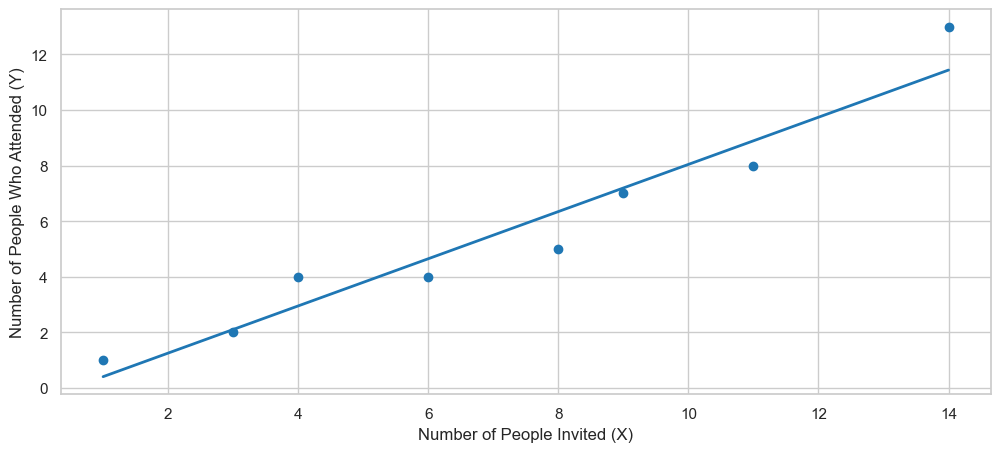

In [58]:
# Your code here.
plt.scatter(X, Y)

# Línea de regresión
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
y_pred = model.predict(x_range)
plt.plot(x_range, y_pred)

plt.xlabel('Number of People Invited (X)')
plt.ylabel('Number of People Who Attended (Y)')
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

**Conclusion:**  
The scatter plot and regression line show a clear positive relationship between the number of people invited (X) and the number of people who attended (Y). The regression equation for the model is:

\[
Y = -0.44 + 0.85X
\]

This indicates that while inviting more people does lead to more attendees, the increase is not one-to-one; for each additional person invited, only about 0.85 people attend on average. The high R² value (0.93) suggests that the model fits the data very well, meaning that the number of invitations is a strong predictor of attendance. Overall, we can be confident that inviting more people will usually result in higher attendance, but not everyone invited will show up.


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [59]:
# Your response here.
# Calculate residuals
y_pred = model.predict(X)
residuals = Y - y_pred
print(residuals)


[ 0.59090909 -0.10606061  1.04545455 -0.65151515 -1.34848485 -0.1969697
 -0.89393939  1.56060606]


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

*your explanation here*

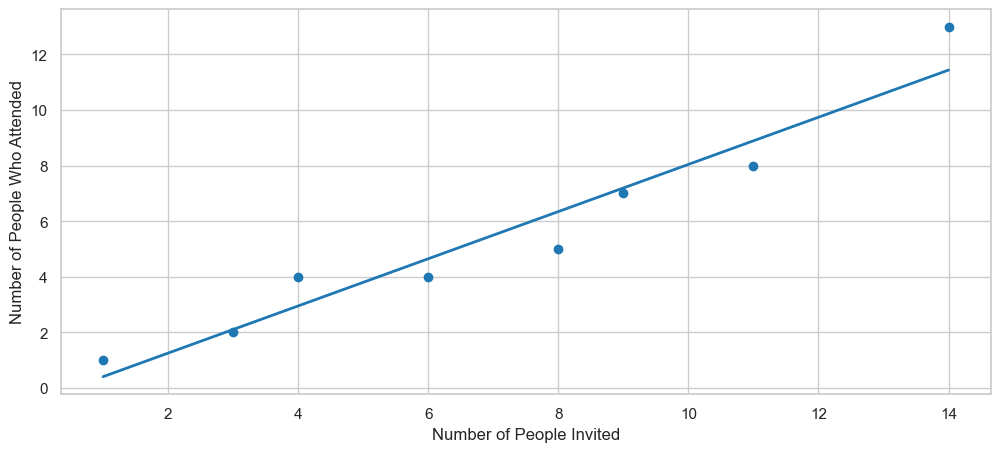

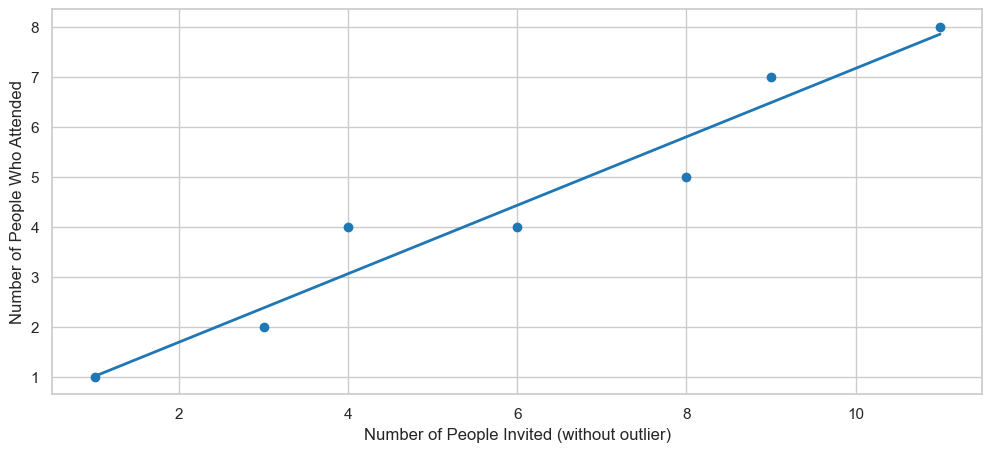

In [60]:
# Remove the possible outlier (14,13)
X_new = np.array([1,3,4,6,8,9,11]).reshape(-1,1)
Y_new = np.array([1,2,4,4,5,7,8])

# Fit new model
model_new = LinearRegression()
model_new.fit(X_new, Y_new)
r2_new = model_new.score(X_new, Y_new)
slope_new = model_new.coef_[0]
intercept_new = model_new.intercept_

# Plot original model
plt.scatter(X, Y)
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
plt.plot(x_range, model.predict(x_range))
plt.xlabel('Number of People Invited')
plt.ylabel('Number of People Who Attended')
plt.show()

# Plot new model after removing outlier
plt.scatter(X_new, Y_new)
x_range_new = np.linspace(X_new.min(), X_new.max(), 100).reshape(-1,1)
plt.plot(x_range_new, model_new.predict(x_range_new))
plt.xlabel('Number of People Invited (without outlier)')
plt.ylabel('Number of People Who Attended')
plt.show()


**Interpretation:**
The point (14, 13) has a strong influence on the regression model. With this point included, the slope is steeper (0.85) and the relationship appears stronger. After removing the point, the slope decreases to 0.68, meaning the number of attendees increases more slowly as the number of guests invited increases. The R² slightly increases from 0.93 to 0.94, suggesting a slightly better fit to the remaining data. The form of the data remains linear in both cases, but the outlier made the relationship appear stronger than it truly is.
